In [1]:
###importing libraries

#Data Manipulation
import pandas as pd
import numpy as np
import os

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Statistical tools
from scipy import stats
from statistics import mode
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import statistics

#Clustering
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

#Dimensional reduction
from sklearn.decomposition import PCA

##knn for imputing
from sklearn.impute import KNNImputer

#Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#regular expression
import re

#feature selection with lasso
from sklearn.linear_model import LassoCV

#train test split
from sklearn.model_selection import train_test_split

#Cross Validation
from sklearn.model_selection import cross_val_score

#Regression Models
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor

#Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime

#Hyperparameter Tuning
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
import time
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
def NAoutliers(df,feature):
    #Creating IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    ###Select 
    mask = (df[feature] < (Q1 - 1.5 * float(IQR))) | (df[feature] > (Q3 + 1.5 * float(IQR)))
    df.loc[mask,feature] = np.nan
    
def cv_rmse(model, X, y):
    return np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=20))

In [3]:
##setting the directory
os.chdir('C:/Users/User/Desktop/Kaggle/Predicting House Price')

In [4]:
###print all rows
pd.set_option('display.max_rows', 500)

In [5]:
##importing train.csv
dtype_dict_train = {
'Id':str,
'MSSubClass':str,
'MSZoning':str,
'LotFrontage':float,
'LotArea':float,
'Street':str,
'Alley':str,
'LotShape':str,
'LandContour':str,
'Utilities':str,
'LotConfig':str,
'LandSlope':str,
'Neighborhood':str,
'Condition1':str,
'Condition2':str,
'BldgType':str,
'HouseStyle':str,
'OverallQual':str,
'OverallCond':str,
'YearBuilt':str,
'YearRemodAdd':str,
'RoofStyle':str,
'RoofMatl':str,
'Exterior1st':str,
'Exterior2nd':str,
'MasVnrType':str,
'MasVnrArea':float,
'ExterQual':str,
'ExterCond':str,
'Foundation':str,
'BsmtQual':str,
'BsmtCond':str,
'BsmtExposure':str,
'BsmtFinType1':str,
'BsmtFinSF1':float,
'BsmtFinType2':str,
'BsmtFinSF2':float,
'BsmtUnfSF':float,
'TotalBsmtSF':float,
'Heating':str,
'HeatingQC':str,
'CentralAir':str,
'Electrical':str,
'1stFlrSF':float,
'2ndFlrSF':float,
'LowQualFinSF':float,
'GrLivArea':float,
'BsmtFullBath':int,
'BsmtHalfBath':int,
'FullBath':int,
'HalfBath':int,
'BedroomAbvGr':int,
'KitchenAbvGr':int,
'KitchenQual':str,
'TotRmsAbvGrd':int,
'Functional':str,
'Fireplaces':int,
'FireplaceQu':str,
'GarageType':str,
'GarageYrBlt':str,
'GarageFinish':str,
'GarageCars':int,
'GarageArea':float,
'GarageQual':str,
'GarageCond':str,
'PavedDrive':str,
'WoodDeckSF':float,
'OpenPorchSF':float,
'EnclosedPorch':float,
'3SsnPorch':float,
'ScreenPorch':float,
'PoolArea':float,
'PoolQC':str,
'Fence':str,
'MiscFeature':str,
'MiscVal':float,
'MoSold':int,
'YrSold':str,
'SaleType':str,
'SaleCondition':str,
'SalePrice':float}

dfTrain = pd.read_csv('train.csv',dtype=dtype_dict_train,na_values='NA')

In [6]:
##importing test.csv
dtype_dict_test = {
'Id':str,
'MSSubClass':str,
'MSZoning':str,
'LotFrontage':float,
'LotArea':float,
'Street':str,
'Alley':str,
'LotShape':str,
'LandContour':str,
'Utilities':str,
'LotConfig':str,
'LandSlope':str,
'Neighborhood':str,
'Condition1':str,
'Condition2':str,
'BldgType':str,
'HouseStyle':str,
'OverallQual':str,
'OverallCond':str,
'YearBuilt':str,
'YearRemodAdd':str,
'RoofStyle':str,
'RoofMatl':str,
'Exterior1st':str,
'Exterior2nd':str,
'MasVnrType':str,
'MasVnrArea':float,
'ExterQual':str,
'ExterCond':str,
'Foundation':str,
'BsmtQual':str,
'BsmtCond':str,
'BsmtExposure':str,
'BsmtFinType1':str,
'BsmtFinSF1':float,
'BsmtFinType2':str,
'BsmtFinSF2':float,
'BsmtUnfSF':float,
'TotalBsmtSF':float,
'Heating':str,
'HeatingQC':str,
'CentralAir':str,
'Electrical':str,
'1stFlrSF':float,
'2ndFlrSF':float,
'LowQualFinSF':float,
'GrLivArea':float,
'BsmtFullBath':float,
'BsmtHalfBath':float,
'FullBath':int,
'HalfBath':int,
'BedroomAbvGr':int,
'KitchenAbvGr':int,
'KitchenQual':str,
'TotRmsAbvGrd':int,
'Functional':str,
'Fireplaces':int,
'FireplaceQu':str,
'GarageType':str,
'GarageYrBlt':str,
'GarageFinish':str,
'GarageCars':float,
'GarageArea':float,
'GarageQual':str,
'GarageCond':str,
'PavedDrive':str,
'WoodDeckSF':float,
'OpenPorchSF':float,
'EnclosedPorch':float,
'3SsnPorch':float,
'ScreenPorch':float,
'PoolArea':float,
'PoolQC':str,
'Fence':str,
'MiscFeature':str,
'MiscVal':float,
'MoSold':int,
'YrSold':str,
'SaleType':str,
'SaleCondition':str}

dfTest = pd.read_csv('test.csv',dtype=dtype_dict_test,na_values='NA')

In [8]:
#EDA

## Print first five rows
print(dfTrain.head())
## Print last five rows
print(dfTrain.tail())
## Print rows and columns 
print(dfTrain.shape)

###print not null and type of object
print(dfTrain.info())

###check percentage missing values by column
dfTrain.isnull().sum()/(dfTrain.shape[0])

  Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1         60       RL         65.0   8450.0   Pave   NaN      Reg   
1  2         20       RL         80.0   9600.0   Pave   NaN      Reg   
2  3         60       RL         68.0  11250.0   Pave   NaN      IR1   
3  4         70       RL         60.0   9550.0   Pave   NaN      IR1   
4  5         60       RL         84.0  14260.0   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...      0.0    NaN   NaN         NaN     0.0      2   
1         Lvl    AllPub  ...      0.0    NaN   NaN         NaN     0.0      5   
2         Lvl    AllPub  ...      0.0    NaN   NaN         NaN     0.0      9   
3         Lvl    AllPub  ...      0.0    NaN   NaN         NaN     0.0      2   
4         Lvl    AllPub  ...      0.0    NaN   NaN         NaN     0.0     12   

  YrSold SaleType SaleCondition SalePrice  
0   2008       WD        Normal  208

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

In [531]:
##divide the columns in category
CategoricalColumn = dfTrain.select_dtypes(include=['object']).columns.values
ContinuousColumn = dfTrain.select_dtypes(include=['float64']).columns.values
NumericalValue = dfTrain.select_dtypes(include=['int32']).columns.values

In [85]:
##EDA continuous variables 
for column in ContinuousColumn:
    os.chdir('C:/Users/User/Desktop/Kaggle/Predicting House Price/Continuous Column Graph')
    # matplotlib histogram
    plt.hist(dfTrain[column])
    # Saving the figure.
    plt.savefig(column + ".jpg")
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [454]:
##normality test

test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(dfTrain[ContinuousColumn])
normal = normal.apply(test_normality)
print(not normal.any())

#false

#Also none of quantitative variables has normal distribution so these should be transformed as well.

False


In [86]:
##Pie chart of the categorical value
for column in CategoricalColumn:
    os.chdir('C:/Users/User/Desktop/Kaggle/Predicting House Price/Categorical Column Graph')
    # matplotlib histogram
    dfTrain[column].value_counts().plot(kind='pie')
    # Saving the figure.
    plt.savefig(column + ".jpg")
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [89]:
##EDA Numerical variables 
for column in NumericalValue:
    os.chdir('C:/Users/User/Desktop/Kaggle/Predicting House Price/Numerical Column Graph')
    # matplotlib histogram
    plt.hist(dfTrain[column])
    # Saving the figure.
    plt.savefig(column + ".jpg")
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [93]:
##EDA Scatter plot columns and target variables
for column in ContinuousColumn:
    os.chdir('C:/Users/User/Desktop/Kaggle/Predicting House Price/Scatter Plot Continuous variables')
    # matplotlib scatterplot
    plt.plot(dfTrain[column], dfTrain['SalePrice'], 'o', color='black')
    # Saving the figure.
    plt.savefig(column + ".jpg")
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [102]:
##EDA Scatter plot columns and target variables + cathegorical variables
os.chdir('C:/Users/User/Desktop/Kaggle/Predicting House Price/Scatter Categorical value')
for scatter in ContinuousColumn:
    for column in CategoricalColumn:
        sns.lmplot(x=scatter, y='SalePrice', data=dfTrain, hue=column, fit_reg=False)
        # Saving the figure. 
        title = scatter + "_" + column
        plt.savefig(title + ".jpg")
        plt.clf()
        title = []

<Figure size 421.5x360 with 0 Axes>

<Figure size 425.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 414.875x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

<Figure size 437.25x360 with 0 Axes>

<Figure size 437.75x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 444.25x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 434.875x360 with 0 Axes>

<Figure size 429.75x360 with 0 Axes>

<Figure size 438.875x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 444.875x360 with 0 Axes>

<Figure size 442.125x360 with 0 Axes>

<Figure size 435.625x360 with 0 Axes>

<Figure size 417.375x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 429.875x360 with 0 Axes>

<Figure size 416.75x360 with 0 Axes>

<Figure size 419.25x360 with 0 Axes>

<Figure size 439.625x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 425x360 with 0 Axes>

<Figure size 421.875x360 with 0 Axes>

<Figure size 418.25x360 with 0 Axes>

<Figure size 425.875x360 with 0 Axes>

<Figure size 428.75x360 with 0 Axes>

<Figure size 420.25x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 440.25x360 with 0 Axes>

<Figure size 433.375x360 with 0 Axes>

<Figure size 427.75x360 with 0 Axes>

<Figure size 430.25x360 with 0 Axes>

<Figure size 424.75x360 with 0 Axes>

<Figure size 410.125x360 with 0 Axes>

<Figure size 429x360 with 0 Axes>

<Figure size 428x360 with 0 Axes>

<Figure size 428.875x360 with 0 Axes>

<Figure size 438x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 425.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 414.875x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

<Figure size 437.25x360 with 0 Axes>

<Figure size 437.75x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 444.25x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 434.875x360 with 0 Axes>

<Figure size 429.75x360 with 0 Axes>

<Figure size 438.875x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 444.875x360 with 0 Axes>

<Figure size 442.125x360 with 0 Axes>

<Figure size 435.625x360 with 0 Axes>

<Figure size 417.375x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 429.875x360 with 0 Axes>

<Figure size 416.75x360 with 0 Axes>

<Figure size 419.25x360 with 0 Axes>

<Figure size 439.625x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 425x360 with 0 Axes>

<Figure size 421.875x360 with 0 Axes>

<Figure size 418.25x360 with 0 Axes>

<Figure size 425.875x360 with 0 Axes>

<Figure size 428.75x360 with 0 Axes>

<Figure size 420.25x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 440.25x360 with 0 Axes>

<Figure size 433.375x360 with 0 Axes>

<Figure size 427.75x360 with 0 Axes>

<Figure size 430.25x360 with 0 Axes>

<Figure size 424.75x360 with 0 Axes>

<Figure size 410.125x360 with 0 Axes>

<Figure size 429x360 with 0 Axes>

<Figure size 428x360 with 0 Axes>

<Figure size 428.875x360 with 0 Axes>

<Figure size 438x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 425.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 414.875x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

<Figure size 437.25x360 with 0 Axes>

<Figure size 437.75x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 444.25x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 434.875x360 with 0 Axes>

<Figure size 429.75x360 with 0 Axes>

<Figure size 438.875x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 444.875x360 with 0 Axes>

<Figure size 442.125x360 with 0 Axes>

<Figure size 435.625x360 with 0 Axes>

<Figure size 417.375x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 429.875x360 with 0 Axes>

<Figure size 416.75x360 with 0 Axes>

<Figure size 419.25x360 with 0 Axes>

<Figure size 439.625x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 425x360 with 0 Axes>

<Figure size 421.875x360 with 0 Axes>

<Figure size 418.25x360 with 0 Axes>

<Figure size 425.875x360 with 0 Axes>

<Figure size 428.75x360 with 0 Axes>

<Figure size 420.25x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 440.25x360 with 0 Axes>

<Figure size 433.375x360 with 0 Axes>

<Figure size 427.75x360 with 0 Axes>

<Figure size 430.25x360 with 0 Axes>

<Figure size 424.75x360 with 0 Axes>

<Figure size 410.125x360 with 0 Axes>

<Figure size 429x360 with 0 Axes>

<Figure size 428x360 with 0 Axes>

<Figure size 428.875x360 with 0 Axes>

<Figure size 438x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 425.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 414.875x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

<Figure size 437.25x360 with 0 Axes>

<Figure size 437.75x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 444.25x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 434.875x360 with 0 Axes>

<Figure size 429.75x360 with 0 Axes>

<Figure size 438.875x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 444.875x360 with 0 Axes>

<Figure size 442.125x360 with 0 Axes>

<Figure size 435.625x360 with 0 Axes>

<Figure size 417.375x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 429.875x360 with 0 Axes>

<Figure size 416.75x360 with 0 Axes>

<Figure size 419.25x360 with 0 Axes>

<Figure size 439.625x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 425x360 with 0 Axes>

<Figure size 421.875x360 with 0 Axes>

<Figure size 418.25x360 with 0 Axes>

<Figure size 425.875x360 with 0 Axes>

<Figure size 428.75x360 with 0 Axes>

<Figure size 420.25x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 440.25x360 with 0 Axes>

<Figure size 433.375x360 with 0 Axes>

<Figure size 427.75x360 with 0 Axes>

<Figure size 430.25x360 with 0 Axes>

<Figure size 424.75x360 with 0 Axes>

<Figure size 410.125x360 with 0 Axes>

<Figure size 429x360 with 0 Axes>

<Figure size 428x360 with 0 Axes>

<Figure size 428.875x360 with 0 Axes>

<Figure size 438x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 425.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 414.875x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

<Figure size 437.25x360 with 0 Axes>

<Figure size 437.75x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 444.25x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 434.875x360 with 0 Axes>

<Figure size 429.75x360 with 0 Axes>

<Figure size 438.875x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 444.875x360 with 0 Axes>

<Figure size 442.125x360 with 0 Axes>

<Figure size 435.625x360 with 0 Axes>

<Figure size 417.375x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 429.875x360 with 0 Axes>

<Figure size 416.75x360 with 0 Axes>

<Figure size 419.25x360 with 0 Axes>

<Figure size 439.625x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 425x360 with 0 Axes>

<Figure size 421.875x360 with 0 Axes>

<Figure size 418.25x360 with 0 Axes>

<Figure size 425.875x360 with 0 Axes>

<Figure size 428.75x360 with 0 Axes>

<Figure size 420.25x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 440.25x360 with 0 Axes>

<Figure size 433.375x360 with 0 Axes>

<Figure size 427.75x360 with 0 Axes>

<Figure size 430.25x360 with 0 Axes>

<Figure size 424.75x360 with 0 Axes>

<Figure size 410.125x360 with 0 Axes>

<Figure size 429x360 with 0 Axes>

<Figure size 428x360 with 0 Axes>

<Figure size 428.875x360 with 0 Axes>

<Figure size 438x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 425.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 414.875x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

<Figure size 437.25x360 with 0 Axes>

<Figure size 437.75x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 444.25x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 434.875x360 with 0 Axes>

<Figure size 429.75x360 with 0 Axes>

<Figure size 438.875x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 444.875x360 with 0 Axes>

<Figure size 442.125x360 with 0 Axes>

<Figure size 435.625x360 with 0 Axes>

<Figure size 417.375x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 429.875x360 with 0 Axes>

<Figure size 416.75x360 with 0 Axes>

<Figure size 419.25x360 with 0 Axes>

<Figure size 439.625x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 425x360 with 0 Axes>

<Figure size 421.875x360 with 0 Axes>

<Figure size 418.25x360 with 0 Axes>

<Figure size 425.875x360 with 0 Axes>

<Figure size 428.75x360 with 0 Axes>

<Figure size 420.25x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 440.25x360 with 0 Axes>

<Figure size 433.375x360 with 0 Axes>

<Figure size 427.75x360 with 0 Axes>

<Figure size 430.25x360 with 0 Axes>

<Figure size 424.75x360 with 0 Axes>

<Figure size 410.125x360 with 0 Axes>

<Figure size 429x360 with 0 Axes>

<Figure size 428x360 with 0 Axes>

<Figure size 428.875x360 with 0 Axes>

<Figure size 438x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 425.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 414.875x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

<Figure size 437.25x360 with 0 Axes>

<Figure size 437.75x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 444.25x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 434.875x360 with 0 Axes>

<Figure size 429.75x360 with 0 Axes>

<Figure size 438.875x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 444.875x360 with 0 Axes>

<Figure size 442.125x360 with 0 Axes>

<Figure size 435.625x360 with 0 Axes>

<Figure size 417.375x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 429.875x360 with 0 Axes>

<Figure size 416.75x360 with 0 Axes>

<Figure size 419.25x360 with 0 Axes>

<Figure size 439.625x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 425x360 with 0 Axes>

<Figure size 421.875x360 with 0 Axes>

<Figure size 418.25x360 with 0 Axes>

<Figure size 425.875x360 with 0 Axes>

<Figure size 428.75x360 with 0 Axes>

<Figure size 420.25x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 440.25x360 with 0 Axes>

<Figure size 433.375x360 with 0 Axes>

<Figure size 427.75x360 with 0 Axes>

<Figure size 430.25x360 with 0 Axes>

<Figure size 424.75x360 with 0 Axes>

<Figure size 410.125x360 with 0 Axes>

<Figure size 429x360 with 0 Axes>

<Figure size 428x360 with 0 Axes>

<Figure size 428.875x360 with 0 Axes>

<Figure size 438x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 425.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 414.875x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

<Figure size 437.25x360 with 0 Axes>

<Figure size 437.75x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 444.25x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 434.875x360 with 0 Axes>

<Figure size 429.75x360 with 0 Axes>

<Figure size 438.875x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 444.875x360 with 0 Axes>

<Figure size 442.125x360 with 0 Axes>

<Figure size 435.625x360 with 0 Axes>

<Figure size 417.375x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 429.875x360 with 0 Axes>

<Figure size 416.75x360 with 0 Axes>

<Figure size 419.25x360 with 0 Axes>

<Figure size 439.625x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 425x360 with 0 Axes>

<Figure size 421.875x360 with 0 Axes>

<Figure size 418.25x360 with 0 Axes>

<Figure size 425.875x360 with 0 Axes>

<Figure size 428.75x360 with 0 Axes>

<Figure size 420.25x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 440.25x360 with 0 Axes>

<Figure size 433.375x360 with 0 Axes>

<Figure size 427.75x360 with 0 Axes>

<Figure size 430.25x360 with 0 Axes>

<Figure size 424.75x360 with 0 Axes>

<Figure size 410.125x360 with 0 Axes>

<Figure size 429x360 with 0 Axes>

<Figure size 428x360 with 0 Axes>

<Figure size 428.875x360 with 0 Axes>

<Figure size 438x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 425.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 414.875x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

<Figure size 437.25x360 with 0 Axes>

<Figure size 437.75x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 444.25x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 434.875x360 with 0 Axes>

<Figure size 429.75x360 with 0 Axes>

<Figure size 438.875x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 444.875x360 with 0 Axes>

<Figure size 442.125x360 with 0 Axes>

<Figure size 435.625x360 with 0 Axes>

<Figure size 417.375x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 429.875x360 with 0 Axes>

<Figure size 416.75x360 with 0 Axes>

<Figure size 419.25x360 with 0 Axes>

<Figure size 439.625x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 425x360 with 0 Axes>

<Figure size 421.875x360 with 0 Axes>

<Figure size 418.25x360 with 0 Axes>

<Figure size 425.875x360 with 0 Axes>

<Figure size 428.75x360 with 0 Axes>

<Figure size 420.25x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 440.25x360 with 0 Axes>

<Figure size 433.375x360 with 0 Axes>

<Figure size 427.75x360 with 0 Axes>

<Figure size 430.25x360 with 0 Axes>

<Figure size 424.75x360 with 0 Axes>

<Figure size 410.125x360 with 0 Axes>

<Figure size 429x360 with 0 Axes>

<Figure size 428x360 with 0 Axes>

<Figure size 428.875x360 with 0 Axes>

<Figure size 438x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 425.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 414.875x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

<Figure size 437.25x360 with 0 Axes>

<Figure size 437.75x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 444.25x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 434.875x360 with 0 Axes>

<Figure size 429.75x360 with 0 Axes>

<Figure size 438.875x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 444.875x360 with 0 Axes>

<Figure size 442.125x360 with 0 Axes>

<Figure size 435.625x360 with 0 Axes>

<Figure size 417.375x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 429.875x360 with 0 Axes>

<Figure size 416.75x360 with 0 Axes>

<Figure size 419.25x360 with 0 Axes>

<Figure size 439.625x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 425x360 with 0 Axes>

<Figure size 421.875x360 with 0 Axes>

<Figure size 418.25x360 with 0 Axes>

<Figure size 425.875x360 with 0 Axes>

<Figure size 428.75x360 with 0 Axes>

<Figure size 420.25x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 440.25x360 with 0 Axes>

<Figure size 433.375x360 with 0 Axes>

<Figure size 427.75x360 with 0 Axes>

<Figure size 430.25x360 with 0 Axes>

<Figure size 424.75x360 with 0 Axes>

<Figure size 410.125x360 with 0 Axes>

<Figure size 429x360 with 0 Axes>

<Figure size 428x360 with 0 Axes>

<Figure size 428.875x360 with 0 Axes>

<Figure size 438x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 425.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 414.875x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

<Figure size 437.25x360 with 0 Axes>

<Figure size 437.75x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 444.25x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 434.875x360 with 0 Axes>

<Figure size 429.75x360 with 0 Axes>

<Figure size 438.875x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 444.875x360 with 0 Axes>

<Figure size 442.125x360 with 0 Axes>

<Figure size 435.625x360 with 0 Axes>

<Figure size 417.375x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 429.875x360 with 0 Axes>

<Figure size 416.75x360 with 0 Axes>

<Figure size 419.25x360 with 0 Axes>

<Figure size 439.625x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 425x360 with 0 Axes>

<Figure size 421.875x360 with 0 Axes>

<Figure size 418.25x360 with 0 Axes>

<Figure size 425.875x360 with 0 Axes>

<Figure size 428.75x360 with 0 Axes>

<Figure size 420.25x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 440.25x360 with 0 Axes>

<Figure size 433.375x360 with 0 Axes>

<Figure size 427.75x360 with 0 Axes>

<Figure size 430.25x360 with 0 Axes>

<Figure size 424.75x360 with 0 Axes>

<Figure size 410.125x360 with 0 Axes>

<Figure size 429x360 with 0 Axes>

<Figure size 428x360 with 0 Axes>

<Figure size 428.875x360 with 0 Axes>

<Figure size 438x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 425.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 414.875x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

<Figure size 437.25x360 with 0 Axes>

<Figure size 437.75x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 444.25x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 434.875x360 with 0 Axes>

<Figure size 429.75x360 with 0 Axes>

<Figure size 438.875x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 444.875x360 with 0 Axes>

<Figure size 442.125x360 with 0 Axes>

<Figure size 435.625x360 with 0 Axes>

<Figure size 417.375x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 429.875x360 with 0 Axes>

<Figure size 416.75x360 with 0 Axes>

<Figure size 419.25x360 with 0 Axes>

<Figure size 439.625x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 425x360 with 0 Axes>

<Figure size 421.875x360 with 0 Axes>

<Figure size 418.25x360 with 0 Axes>

<Figure size 425.875x360 with 0 Axes>

<Figure size 428.75x360 with 0 Axes>

<Figure size 420.25x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 440.25x360 with 0 Axes>

<Figure size 433.375x360 with 0 Axes>

<Figure size 427.75x360 with 0 Axes>

<Figure size 430.25x360 with 0 Axes>

<Figure size 424.75x360 with 0 Axes>

<Figure size 410.125x360 with 0 Axes>

<Figure size 429x360 with 0 Axes>

<Figure size 428x360 with 0 Axes>

<Figure size 428.875x360 with 0 Axes>

<Figure size 438x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 425.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 414.875x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

<Figure size 437.25x360 with 0 Axes>

<Figure size 437.75x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 444.25x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 434.875x360 with 0 Axes>

<Figure size 429.75x360 with 0 Axes>

<Figure size 438.875x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 444.875x360 with 0 Axes>

<Figure size 442.125x360 with 0 Axes>

<Figure size 435.625x360 with 0 Axes>

<Figure size 417.375x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 429.875x360 with 0 Axes>

<Figure size 416.75x360 with 0 Axes>

<Figure size 419.25x360 with 0 Axes>

<Figure size 439.625x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 425x360 with 0 Axes>

<Figure size 421.875x360 with 0 Axes>

<Figure size 418.25x360 with 0 Axes>

<Figure size 425.875x360 with 0 Axes>

<Figure size 428.75x360 with 0 Axes>

<Figure size 420.25x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 440.25x360 with 0 Axes>

<Figure size 433.375x360 with 0 Axes>

<Figure size 427.75x360 with 0 Axes>

<Figure size 430.25x360 with 0 Axes>

<Figure size 424.75x360 with 0 Axes>

<Figure size 410.125x360 with 0 Axes>

<Figure size 429x360 with 0 Axes>

<Figure size 428x360 with 0 Axes>

<Figure size 428.875x360 with 0 Axes>

<Figure size 438x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 425.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 414.875x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

<Figure size 437.25x360 with 0 Axes>

<Figure size 437.75x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 444.25x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 434.875x360 with 0 Axes>

<Figure size 429.75x360 with 0 Axes>

<Figure size 438.875x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 444.875x360 with 0 Axes>

<Figure size 442.125x360 with 0 Axes>

<Figure size 435.625x360 with 0 Axes>

<Figure size 417.375x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 429.875x360 with 0 Axes>

<Figure size 416.75x360 with 0 Axes>

<Figure size 419.25x360 with 0 Axes>

<Figure size 439.625x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 425x360 with 0 Axes>

<Figure size 421.875x360 with 0 Axes>

<Figure size 418.25x360 with 0 Axes>

<Figure size 425.875x360 with 0 Axes>

<Figure size 428.75x360 with 0 Axes>

<Figure size 420.25x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 440.25x360 with 0 Axes>

<Figure size 433.375x360 with 0 Axes>

<Figure size 427.75x360 with 0 Axes>

<Figure size 430.25x360 with 0 Axes>

<Figure size 424.75x360 with 0 Axes>

<Figure size 410.125x360 with 0 Axes>

<Figure size 429x360 with 0 Axes>

<Figure size 428x360 with 0 Axes>

<Figure size 428.875x360 with 0 Axes>

<Figure size 438x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 425.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 414.875x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

<Figure size 437.25x360 with 0 Axes>

<Figure size 437.75x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 444.25x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 434.875x360 with 0 Axes>

<Figure size 429.75x360 with 0 Axes>

<Figure size 438.875x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 444.875x360 with 0 Axes>

<Figure size 442.125x360 with 0 Axes>

<Figure size 435.625x360 with 0 Axes>

<Figure size 417.375x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 429.875x360 with 0 Axes>

<Figure size 416.75x360 with 0 Axes>

<Figure size 419.25x360 with 0 Axes>

<Figure size 439.625x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 425x360 with 0 Axes>

<Figure size 421.875x360 with 0 Axes>

<Figure size 418.25x360 with 0 Axes>

<Figure size 425.875x360 with 0 Axes>

<Figure size 428.75x360 with 0 Axes>

<Figure size 420.25x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 440.25x360 with 0 Axes>

<Figure size 433.375x360 with 0 Axes>

<Figure size 427.75x360 with 0 Axes>

<Figure size 430.25x360 with 0 Axes>

<Figure size 424.75x360 with 0 Axes>

<Figure size 410.125x360 with 0 Axes>

<Figure size 429x360 with 0 Axes>

<Figure size 428x360 with 0 Axes>

<Figure size 428.875x360 with 0 Axes>

<Figure size 438x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 425.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 414.875x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

<Figure size 437.25x360 with 0 Axes>

<Figure size 437.75x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 444.25x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 434.875x360 with 0 Axes>

<Figure size 429.75x360 with 0 Axes>

<Figure size 438.875x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 444.875x360 with 0 Axes>

<Figure size 442.125x360 with 0 Axes>

<Figure size 435.625x360 with 0 Axes>

<Figure size 417.375x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 429.875x360 with 0 Axes>

<Figure size 416.75x360 with 0 Axes>

<Figure size 419.25x360 with 0 Axes>

<Figure size 439.625x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 425x360 with 0 Axes>

<Figure size 421.875x360 with 0 Axes>

<Figure size 418.25x360 with 0 Axes>

<Figure size 425.875x360 with 0 Axes>

<Figure size 428.75x360 with 0 Axes>

<Figure size 420.25x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 440.25x360 with 0 Axes>

<Figure size 433.375x360 with 0 Axes>

<Figure size 427.75x360 with 0 Axes>

<Figure size 430.25x360 with 0 Axes>

<Figure size 424.75x360 with 0 Axes>

<Figure size 410.125x360 with 0 Axes>

<Figure size 429x360 with 0 Axes>

<Figure size 428x360 with 0 Axes>

<Figure size 428.875x360 with 0 Axes>

<Figure size 438x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 425.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 414.875x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

<Figure size 437.25x360 with 0 Axes>

<Figure size 437.75x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 444.25x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 434.875x360 with 0 Axes>

<Figure size 429.75x360 with 0 Axes>

<Figure size 438.875x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 444.875x360 with 0 Axes>

<Figure size 442.125x360 with 0 Axes>

<Figure size 435.625x360 with 0 Axes>

<Figure size 417.375x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 429.875x360 with 0 Axes>

<Figure size 416.75x360 with 0 Axes>

<Figure size 419.25x360 with 0 Axes>

<Figure size 439.625x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 425x360 with 0 Axes>

<Figure size 421.875x360 with 0 Axes>

<Figure size 418.25x360 with 0 Axes>

<Figure size 425.875x360 with 0 Axes>

<Figure size 428.75x360 with 0 Axes>

<Figure size 420.25x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 440.25x360 with 0 Axes>

<Figure size 433.375x360 with 0 Axes>

<Figure size 427.75x360 with 0 Axes>

<Figure size 430.25x360 with 0 Axes>

<Figure size 424.75x360 with 0 Axes>

<Figure size 410.125x360 with 0 Axes>

<Figure size 429x360 with 0 Axes>

<Figure size 428x360 with 0 Axes>

<Figure size 428.875x360 with 0 Axes>

<Figure size 438x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 425.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 414.875x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

<Figure size 437.25x360 with 0 Axes>

<Figure size 437.75x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 444.25x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 434.875x360 with 0 Axes>

<Figure size 429.75x360 with 0 Axes>

<Figure size 438.875x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 444.875x360 with 0 Axes>

<Figure size 442.125x360 with 0 Axes>

<Figure size 435.625x360 with 0 Axes>

<Figure size 417.375x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 429.875x360 with 0 Axes>

<Figure size 416.75x360 with 0 Axes>

<Figure size 419.25x360 with 0 Axes>

<Figure size 439.625x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 425x360 with 0 Axes>

<Figure size 421.875x360 with 0 Axes>

<Figure size 418.25x360 with 0 Axes>

<Figure size 425.875x360 with 0 Axes>

<Figure size 428.75x360 with 0 Axes>

<Figure size 420.25x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 440.25x360 with 0 Axes>

<Figure size 433.375x360 with 0 Axes>

<Figure size 427.75x360 with 0 Axes>

<Figure size 430.25x360 with 0 Axes>

<Figure size 424.75x360 with 0 Axes>

<Figure size 410.125x360 with 0 Axes>

<Figure size 429x360 with 0 Axes>

<Figure size 428x360 with 0 Axes>

<Figure size 428.875x360 with 0 Axes>

<Figure size 438x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 425.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 414.875x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

<Figure size 437.25x360 with 0 Axes>

<Figure size 437.75x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 444.25x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 434.875x360 with 0 Axes>

<Figure size 429.75x360 with 0 Axes>

<Figure size 438.875x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 444.875x360 with 0 Axes>

<Figure size 442.125x360 with 0 Axes>

<Figure size 435.625x360 with 0 Axes>

<Figure size 417.375x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 429.875x360 with 0 Axes>

<Figure size 416.75x360 with 0 Axes>

<Figure size 419.25x360 with 0 Axes>

<Figure size 439.625x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 425x360 with 0 Axes>

<Figure size 421.875x360 with 0 Axes>

<Figure size 418.25x360 with 0 Axes>

<Figure size 425.875x360 with 0 Axes>

<Figure size 428.75x360 with 0 Axes>

<Figure size 420.25x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 440.25x360 with 0 Axes>

<Figure size 433.375x360 with 0 Axes>

<Figure size 427.75x360 with 0 Axes>

<Figure size 430.25x360 with 0 Axes>

<Figure size 424.75x360 with 0 Axes>

<Figure size 410.125x360 with 0 Axes>

<Figure size 429x360 with 0 Axes>

<Figure size 428x360 with 0 Axes>

<Figure size 428.875x360 with 0 Axes>

<Figure size 438x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 425.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 414.875x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

<Figure size 437.25x360 with 0 Axes>

<Figure size 437.75x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 444.25x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 434.875x360 with 0 Axes>

<Figure size 429.75x360 with 0 Axes>

<Figure size 438.875x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 444.875x360 with 0 Axes>

<Figure size 442.125x360 with 0 Axes>

<Figure size 435.625x360 with 0 Axes>

<Figure size 417.375x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 429.875x360 with 0 Axes>

<Figure size 416.75x360 with 0 Axes>

<Figure size 419.25x360 with 0 Axes>

<Figure size 439.625x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 425x360 with 0 Axes>

<Figure size 421.875x360 with 0 Axes>

<Figure size 418.25x360 with 0 Axes>

<Figure size 425.875x360 with 0 Axes>

<Figure size 428.75x360 with 0 Axes>

<Figure size 420.25x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 440.25x360 with 0 Axes>

<Figure size 433.375x360 with 0 Axes>

<Figure size 427.75x360 with 0 Axes>

<Figure size 430.25x360 with 0 Axes>

<Figure size 424.75x360 with 0 Axes>

<Figure size 410.125x360 with 0 Axes>

<Figure size 429x360 with 0 Axes>

<Figure size 428x360 with 0 Axes>

<Figure size 428.875x360 with 0 Axes>

<Figure size 438x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 425.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 419.625x360 with 0 Axes>

<Figure size 414.875x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

<Figure size 437.25x360 with 0 Axes>

<Figure size 437.75x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 444.25x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 434.875x360 with 0 Axes>

<Figure size 429.75x360 with 0 Axes>

<Figure size 438.875x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 444.875x360 with 0 Axes>

<Figure size 442.125x360 with 0 Axes>

<Figure size 435.625x360 with 0 Axes>

<Figure size 417.375x360 with 0 Axes>

<Figure size 419.875x360 with 0 Axes>

<Figure size 429.875x360 with 0 Axes>

<Figure size 416.75x360 with 0 Axes>

<Figure size 419.25x360 with 0 Axes>

<Figure size 439.625x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 425x360 with 0 Axes>

<Figure size 421.875x360 with 0 Axes>

<Figure size 418.25x360 with 0 Axes>

<Figure size 425.875x360 with 0 Axes>

<Figure size 428.75x360 with 0 Axes>

<Figure size 420.25x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 440.25x360 with 0 Axes>

<Figure size 433.375x360 with 0 Axes>

<Figure size 427.75x360 with 0 Axes>

<Figure size 430.25x360 with 0 Axes>

<Figure size 424.75x360 with 0 Axes>

<Figure size 410.125x360 with 0 Axes>

<Figure size 429x360 with 0 Axes>

<Figure size 428x360 with 0 Axes>

<Figure size 428.875x360 with 0 Axes>

<Figure size 438x360 with 0 Axes>

In [103]:
##EDA Scatter plot columns and target variables + cathegorical variables
os.chdir('C:/Users/User/Desktop/Kaggle/Predicting House Price/Scatter Numerical value')
for scatter in ContinuousColumn:
    for column in NumericalValue:
        sns.lmplot(x=scatter, y='SalePrice', data=dfTrain, hue=column, fit_reg=False)
        # Saving the figure. 
        title = scatter + "_" + column
        plt.savefig(title + ".jpg")
        plt.clf()
        title = []

<Figure size 428.125x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 429.375x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 443x360 with 0 Axes>

<Figure size 434.25x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 408.625x360 with 0 Axes>

<Figure size 411.375x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 436.5x360 with 0 Axes>

<Figure size 441x360 with 0 Axes>

<Figure size 418x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 408.75x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 428.125x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 429.375x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 443x360 with 0 Axes>

<Figure size 434.25x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 408.625x360 with 0 Axes>

<Figure size 411.375x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 436.5x360 with 0 Axes>

<Figure size 441x360 with 0 Axes>

<Figure size 418x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 408.75x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 428.125x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 429.375x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 443x360 with 0 Axes>

<Figure size 434.25x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 408.625x360 with 0 Axes>

<Figure size 411.375x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 436.5x360 with 0 Axes>

<Figure size 441x360 with 0 Axes>

<Figure size 418x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 408.75x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 428.125x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 429.375x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 443x360 with 0 Axes>

<Figure size 434.25x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 408.625x360 with 0 Axes>

<Figure size 411.375x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 436.5x360 with 0 Axes>

<Figure size 441x360 with 0 Axes>

<Figure size 418x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 408.75x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 428.125x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 429.375x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 443x360 with 0 Axes>

<Figure size 434.25x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 408.625x360 with 0 Axes>

<Figure size 411.375x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 436.5x360 with 0 Axes>

<Figure size 441x360 with 0 Axes>

<Figure size 418x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 408.75x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 428.125x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 429.375x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 443x360 with 0 Axes>

<Figure size 434.25x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 408.625x360 with 0 Axes>

<Figure size 411.375x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 436.5x360 with 0 Axes>

<Figure size 441x360 with 0 Axes>

<Figure size 418x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 408.75x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 428.125x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 429.375x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 443x360 with 0 Axes>

<Figure size 434.25x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 408.625x360 with 0 Axes>

<Figure size 411.375x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 436.5x360 with 0 Axes>

<Figure size 441x360 with 0 Axes>

<Figure size 418x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 408.75x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 428.125x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 429.375x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 443x360 with 0 Axes>

<Figure size 434.25x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 408.625x360 with 0 Axes>

<Figure size 411.375x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 436.5x360 with 0 Axes>

<Figure size 441x360 with 0 Axes>

<Figure size 418x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 408.75x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 428.125x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 429.375x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 443x360 with 0 Axes>

<Figure size 434.25x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 408.625x360 with 0 Axes>

<Figure size 411.375x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 436.5x360 with 0 Axes>

<Figure size 441x360 with 0 Axes>

<Figure size 418x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 408.75x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 428.125x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 429.375x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 443x360 with 0 Axes>

<Figure size 434.25x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 408.625x360 with 0 Axes>

<Figure size 411.375x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 436.5x360 with 0 Axes>

<Figure size 441x360 with 0 Axes>

<Figure size 418x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 408.75x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 428.125x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 429.375x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 443x360 with 0 Axes>

<Figure size 434.25x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 408.625x360 with 0 Axes>

<Figure size 411.375x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 436.5x360 with 0 Axes>

<Figure size 441x360 with 0 Axes>

<Figure size 418x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 408.75x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 428.125x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 429.375x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 443x360 with 0 Axes>

<Figure size 434.25x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 408.625x360 with 0 Axes>

<Figure size 411.375x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 436.5x360 with 0 Axes>

<Figure size 441x360 with 0 Axes>

<Figure size 418x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 408.75x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 428.125x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 429.375x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 443x360 with 0 Axes>

<Figure size 434.25x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 408.625x360 with 0 Axes>

<Figure size 411.375x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 436.5x360 with 0 Axes>

<Figure size 441x360 with 0 Axes>

<Figure size 418x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 408.75x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 428.125x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 429.375x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 443x360 with 0 Axes>

<Figure size 434.25x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 408.625x360 with 0 Axes>

<Figure size 411.375x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 436.5x360 with 0 Axes>

<Figure size 441x360 with 0 Axes>

<Figure size 418x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 408.75x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 428.125x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 429.375x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 443x360 with 0 Axes>

<Figure size 434.25x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 408.625x360 with 0 Axes>

<Figure size 411.375x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 436.5x360 with 0 Axes>

<Figure size 441x360 with 0 Axes>

<Figure size 418x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 408.75x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 428.125x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 429.375x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 443x360 with 0 Axes>

<Figure size 434.25x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 408.625x360 with 0 Axes>

<Figure size 411.375x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 436.5x360 with 0 Axes>

<Figure size 441x360 with 0 Axes>

<Figure size 418x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 408.75x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 428.125x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 429.375x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 443x360 with 0 Axes>

<Figure size 434.25x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 408.625x360 with 0 Axes>

<Figure size 411.375x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 436.5x360 with 0 Axes>

<Figure size 441x360 with 0 Axes>

<Figure size 418x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 408.75x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 428.125x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 429.375x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 443x360 with 0 Axes>

<Figure size 434.25x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 408.625x360 with 0 Axes>

<Figure size 411.375x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 436.5x360 with 0 Axes>

<Figure size 441x360 with 0 Axes>

<Figure size 418x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 408.75x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 428.125x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 429.375x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 443x360 with 0 Axes>

<Figure size 434.25x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 408.625x360 with 0 Axes>

<Figure size 411.375x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 436.5x360 with 0 Axes>

<Figure size 441x360 with 0 Axes>

<Figure size 418x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 408.75x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 428.125x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 429.375x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 443x360 with 0 Axes>

<Figure size 434.25x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 408.625x360 with 0 Axes>

<Figure size 411.375x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 436.5x360 with 0 Axes>

<Figure size 441x360 with 0 Axes>

<Figure size 418x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 408.75x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 428.125x360 with 0 Axes>

<Figure size 426.875x360 with 0 Axes>

<Figure size 429.375x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

<Figure size 443x360 with 0 Axes>

<Figure size 434.25x360 with 0 Axes>

<Figure size 437x360 with 0 Axes>

<Figure size 408.625x360 with 0 Axes>

<Figure size 411.375x360 with 0 Axes>

<Figure size 443.75x360 with 0 Axes>

<Figure size 436.5x360 with 0 Axes>

<Figure size 441x360 with 0 Axes>

<Figure size 418x360 with 0 Axes>

<Figure size 427x360 with 0 Axes>

<Figure size 408.75x360 with 0 Axes>

<Figure size 421.5x360 with 0 Axes>

In [455]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o

In [456]:
qualitative = CategoricalColumn

In [457]:
qual_encoded = []
for q in qualitative:  
    encode(dfTrain, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['Id_E', 'MSSubClass_E', 'MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'OverallQual_E', 'OverallCond_E', 'YearBuilt_E', 'YearRemodAdd_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageYrBlt_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'YrSold_E', 'SaleType_E', 'SaleCondition_E']


In [532]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')

In [ ]:
features = ContinuousColumn.tolist() + qual_encoded + NumericalValue.tolist()
spearman(dfTrain, features)

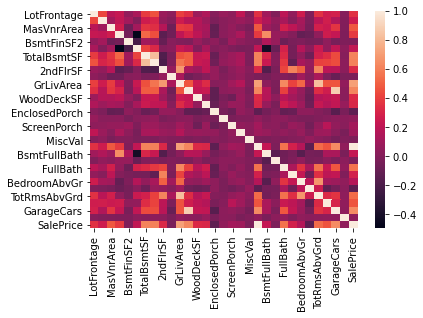

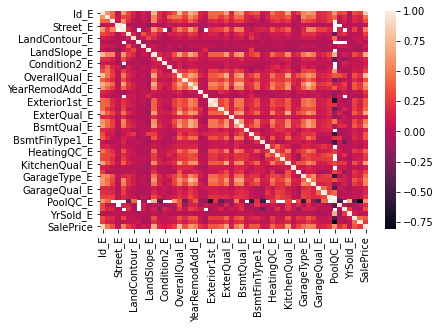

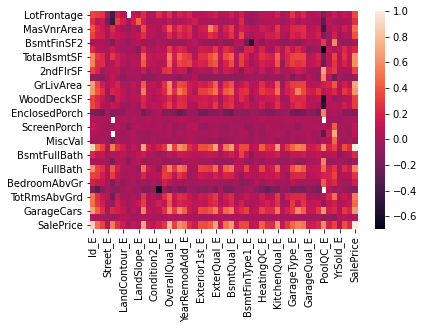

In [460]:
quantitative = ContinuousColumn.tolist() + NumericalValue.tolist()

plt.figure(1)
corr = dfTrain[quantitative+['SalePrice']].corr()
sns.heatmap(corr)
plt.figure(2)
corr = dfTrain[qual_encoded+['SalePrice']].corr()
sns.heatmap(corr)
plt.figure(3)
corr = pd.DataFrame(np.zeros([len(quantitative)+1, len(qual_encoded)+1]), index=quantitative+['SalePrice'], columns=qual_encoded+['SalePrice'])
for q1 in quantitative+['SalePrice']:
    for q2 in qual_encoded+['SalePrice']:
        corr.loc[q1, q2] = dfTrain[q1].corr(dfTrain[q2])
sns.heatmap(corr)

0.8003093635199668


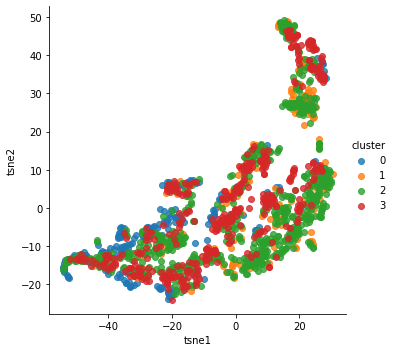

In [461]:
features = ContinuousColumn.tolist() + qual_encoded + NumericalValue.tolist()
features.remove('Id_E')
features.remove('SalePrice')

model = TSNE(n_components=2, random_state=0, perplexity=50)
X = dfTrain[features].fillna(0.).values
tsne = model.fit_transform(X)

std = StandardScaler()
s = std.fit_transform(X)
pca = PCA(n_components=35)
pca.fit(s)
pc = pca.transform(s)
kmeans = KMeans(n_clusters=4)
kmeans.fit(pc)

fr = pd.DataFrame({'tsne1': tsne[:,0], 'tsne2': tsne[:, 1], 'cluster': kmeans.labels_})
sns.lmplot(data=fr, x='tsne1', y='tsne2', hue='cluster', fit_reg=False)
print(np.sum(pca.explained_variance_ratio_))

In [7]:
##setting the directory
os.chdir('C:/Users/User/Desktop/Kaggle/Predicting House Price')

##upload again the train dataset
dfTrain = pd.read_csv('train.csv',dtype=dtype_dict_train,na_values='NA')

In [8]:
##Data Processing
##dropping the ID variable

dfTrain.drop(['Id'], axis=1, inplace=True)
dfTest.drop(['Id'], axis=1, inplace=True)
dfTrain.reset_index(drop=True, inplace=True)

In [9]:
## calculate the log of the outcome variable SalePrice
dfTrain["SalePrice"] = np.log1p(dfTrain["SalePrice"])
##Save the Sale Price to y
y = dfTrain['SalePrice'].reset_index(drop=True)
##drop the variable Sale Price
train_features = dfTrain.drop(['SalePrice'], axis=1)

In [10]:
###Merge train and test
test_features = dfTest
features = pd.concat([train_features, test_features]).reset_index(drop=True)
features.shape

(2919, 79)

In [11]:
## Convert MSSubClass, YrSold and MoSold to string
features['MSSubClass'] = features['MSSubClass'].apply(str)
features['YrSold'] = features['YrSold'].astype(str)
features['MoSold'] = features['MoSold'].astype(str)

In [12]:
## fill Na with none
features['Alley'] = features['Alley'].fillna('None') 
features['BsmtQual'] = features['BsmtQual'].fillna('NoBasement')
features['BsmtCond'] = features['BsmtCond'].fillna('NoBasement')
features['BsmtExposure'] = features['BsmtExposure'].fillna('NoBasement')
features['BsmtFinType1'] = features['BsmtFinType1'].fillna('NoBasement')
features['BsmtFinType2'] = features['BsmtFinType2'].fillna('NoBasement')
features['FireplaceQu'] = features['FireplaceQu'].fillna('NoFireplace')
features['GarageType'] = features['GarageType'].fillna('NoGarage') 
features['GarageFinish'] = features['GarageFinish'].fillna('NoGarage')
features['GarageQual'] = features['GarageQual'].fillna('NoGarage')
features['GarageCond'] = features['GarageCond'].fillna('NoGarage')
features['PoolQC'] = features['PoolQC'].fillna('NoPool') 
features['Fence'] = features['Fence'].fillna('NoFence')
features['MiscFeature'] = features['MiscFeature'].fillna('None')
features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [13]:
##Feature Engineering
features = features.drop(['Utilities', 'Street', 'PoolQC',], axis=1)

features['YrBltAndRemod']=features['YearBuilt'].astype('int')+features['YearRemodAdd'].astype('int')
features['TotalSF']=features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']

features['Total_sqr_footage'] = (features['BsmtFinSF1'] + features['BsmtFinSF2'] +
                                 features['1stFlrSF'] + features['2ndFlrSF'])

features['Total_Bathrooms'] = (features['FullBath'] + (0.5 * features['HalfBath']) +
                               features['BsmtFullBath'] + (0.5 * features['BsmtHalfBath']))

features['Total_porch_sf'] = (features['OpenPorchSF'] + features['3SsnPorch'] +
                              features['EnclosedPorch'] + features['ScreenPorch'] +
                              features['WoodDeckSF'])

In [14]:
## Create Cathegorical features
features['haspool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0).astype(str)
features['has2ndfloor'] = features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0).astype(str)
features['hasgarage'] = features['GarageArea'].apply(lambda x: 1 if x > 0 else 0).astype(str)
features['hasbsmt'] = features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0).astype(str)
features['hasfireplace'] = features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0).astype(str)

In [17]:
###Cleaning cathegorical features
CategoricalFeature = features.select_dtypes(include=['object']).columns.values
featuresCategory = features[CategoricalFeature]

for column in CategoricalFeature:
    featuresCategory[column] = featuresCategory[column].fillna(featuresCategory[column].mode()[0])

<ipython-input-17-564027deb4a9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featuresCategory[column] = featuresCategory[column].fillna(featuresCategory[column].mode()[0])


In [18]:
##One hot encoding categorical feature
featuresCategoryDummy = pd.get_dummies(featuresCategory).reset_index(drop=True)

In [19]:
##Cleaning continuous features

##Detect if a feature is skewed
float_dtypes = ['float16', 'float32', 'float64']
numerics2 = []
for i in features.columns:
    if features[i].dtype in float_dtypes:
        numerics2.append(i)
skew_features = features[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)

##Select teh variable with hight skewness
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

In [20]:
##Apply boxplot transformation
for i in skew_index:
    features[i] = boxcox1p(features[i], boxcox_normmax(features[i] + 1))

C:\Users\User\anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\User\anaconda3\lib\site-packages\scipy\stats\stats.py:3875: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


In [21]:
##Convert outliers to NA
featureNumeric = features.select_dtypes(include=float_dtypes).columns.tolist()
for column in featureNumeric:
    NAoutliers(features,column)

In [22]:
###Cleaned float variables
imputer = KNNImputer(n_neighbors=5)
featureCleaned = pd.DataFrame(imputer.fit_transform(features[featureNumeric]),columns = featureNumeric)

In [23]:
##scale the float variables
scaler = MinMaxScaler()
featureCleanedScale = pd.DataFrame(scaler.fit_transform(featureCleaned), columns = featureCleaned.columns)
featureCleanedScale.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF,Total_sqr_footage,Total_Bathrooms,Total_porch_sf
0,0.434018,0.444929,0.478049,0.389625,0.0,0.089286,0.383751,0.369602,0.514018,0.0,...,0.382495,0.0,0.0,0.0,0.0,0.0,0.507401,0.621493,0.833333,0.195442
1,0.620997,0.517974,0.000000,0.539735,0.0,0.169048,0.591211,0.586832,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.496494,0.568955,0.500000,0.538420
2,0.472959,0.609848,0.395122,0.268212,0.0,0.258333,0.416454,0.410416,0.521462,0.0,...,0.313689,0.0,0.0,0.0,0.0,0.0,0.543755,0.578507,0.833333,0.152880
3,0.367137,0.514970,0.000000,0.119205,0.0,0.321429,0.332652,0.434994,0.453346,0.0,...,0.284151,0.0,0.0,0.0,0.0,0.0,0.483251,0.477313,0.333333,0.548572
4,0.667921,0.749445,0.853659,0.361479,0.0,0.291667,0.531426,0.532961,0.637854,0.0,...,0.451629,0.0,0.0,0.0,0.0,0.0,0.709166,0.751940,0.833333,0.513089


In [24]:
###Cleaning Numerical features
NumericalFeature = features.select_dtypes(include=['int']).columns.values
featureNumerical = features[NumericalFeature]
featureNumerical.shape

(2919, 7)

In [25]:
for column in NumericalFeature:
    NAoutliers(featureNumerical,column)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [26]:
NumericalFeatureClelaned = pd.DataFrame(imputer.fit_transform(featureNumerical),columns = NumericalFeature)

In [27]:
NumericalFeatureClelanedScaled = pd.DataFrame(scaler.fit_transform(NumericalFeatureClelaned), columns = NumericalFeatureClelaned.columns)

In [28]:
###Bind all columns
dfCleaned = pd.concat([NumericalFeatureClelanedScaled,featureCleanedScale,featuresCategoryDummy], axis=1)

In [29]:
##Creating X and X_sub dataset 

X = dfCleaned.iloc[:len(y), :]
X_sub = dfCleaned.iloc[len(y):, :]
X.shape, y.shape, X_sub.shape

((1460, 635), (1460,), (1459, 635))

In [30]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [31]:
##Lasso regression to select the features
regr = LassoCV(cv=10, random_state=101,tol=0.001)
regr.fit(X_train,y_train)

LassoCV(cv=10, random_state=101, tol=0.001)

In [32]:
print("LassoCV Best Alpha Scored: ", regr.alpha_)
print("LassoCV Model Accuracy: ", regr.score(X_test, y_test))
model_coef = pd.Series(regr.coef_, index = list(X.columns))
print("Variables Eliminated: ", str(sum(model_coef == 0)))
print("Variables Kept: ", str(sum(model_coef != 0)))

LassoCV Best Alpha Scored:  0.000823050404357689
LassoCV Model Accuracy:  0.8719523933980763
Variables Eliminated:  526
Variables Kept:  109


In [33]:
##Select feature with no zero values
NoZeroFeature =model_coef[model_coef != 0].index.tolist()

In [34]:
##Creating X and X_sub dataset 

XSelectFeature = dfCleaned[NoZeroFeature].iloc[:len(y), :]
XSelectFeature_sub = dfCleaned[NoZeroFeature].iloc[len(y):, :]
XSelectFeature.shape, y.shape, XSelectFeature_sub.shape

((1460, 109), (1460,), (1459, 109))

In [35]:
##For the X dataset create train and test 
X_SFtrain, X_SFtest, y_SFtrain, y_SFtest = train_test_split(XSelectFeature, y, test_size=0.7, random_state=42)

In [36]:
###Defining gbr
gbr = GradientBoostingRegressor(n_estimators=3000, 
                                learning_rate=0.05, 
                                max_depth=4, 
                                max_features='sqrt', 
                                min_samples_leaf=15, 
                                min_samples_split=10, 
                                loss='huber', 
                                random_state =42)        

##Defining light gbm
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )

##Defining XGBoosting

xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=3460,
                       max_depth=3, 
                       min_child_weight=0,
                       gamma=0, 
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear', 
                       nthread=-1,
                       scale_pos_weight=1, 
                       seed=27,
                       reg_alpha=0.00006)

##Defining SVR
svr = SVR(C=20, epsilon=0.008, gamma=0.0003)

In [37]:
##Cross validation and result for Gradient Boosting Regressor
scoresGbr = cross_val_score(gbr, X_SFtrain, y_SFtrain, cv=20)
print(scoresGbr.mean())
print(scoresGbr.std())

0.8913128633010243
0.06224888525079083


In [38]:
##Cross validation and result for Lightgbm
scoreslightgbm = cross_val_score(lightgbm, X_SFtrain, y_SFtrain, cv=20)
print(scoreslightgbm.mean())
print(scoreslightgbm.std())

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_f

In [39]:
##Cross validation and result for Xgboosting
scoresXgboost = cross_val_score(xgboost, X_SFtrain, y_SFtrain, cv=20)
print(scoresXgboost.mean())
print(scoresXgboost.std())

[12:43:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[12:43:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[12:43:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[12:43:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[12:43:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[12:44:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:17

In [40]:
##Cross validation and result for Support Vector Regression
scoresSVR = cross_val_score(svr, X_SFtrain, y_SFtrain, cv=20)
print(scoresSVR.mean())
print(scoresSVR.std())

0.9023469535490782
0.06780267270104252


In [41]:
##No cross validation prediction
##SVR
modelSVR = svr.fit(X_SFtrain,y_SFtrain)
predictionsSVR = modelSVR.predict(X_SFtest)

mse = mean_squared_error(y_SFtest, predictionsSVR)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_SFtest, predictionsSVR)
print("R2:", r2)

MSE: 0.024152224941156673
RMSE: 0.155409861145156
R2: 0.8569947166679797


In [42]:
##Gradient Boosting Regressor
modelGBR = gbr.fit(X_SFtrain,y_SFtrain)
predictionsGBR = modelGBR.predict(X_SFtest)

mse = mean_squared_error(y_SFtest, predictionsGBR)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_SFtest, predictionsGBR)
print("R2:", r2)

MSE: 0.023503395423103816
RMSE: 0.1533081714166072
R2: 0.8608364351551744


In [43]:
##Lightgbm
modellightgbm = lightgbm.fit(X_SFtrain,y_SFtrain)
predictionsLightGbm = modellightgbm.predict(X_SFtest)

mse = mean_squared_error(y_SFtest, predictionsLightGbm)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_SFtest, predictionsLightGbm)
print("R2:", r2)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
MSE: 0.02470561055335915
RMSE: 0.15718018498958178
R2: 0.8537181213871026


In [44]:
##Xgboosting
modelxgboost = xgboost.fit(X_SFtrain,y_SFtrain)
predictionsXgboost = modelxgboost.predict(X_SFtest)

mse = mean_squared_error(y_SFtest, predictionsXgboost)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_SFtest, predictionsXgboost)
print("R2:", r2)

[12:47:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
MSE: 0.022773610739625784
RMSE: 0.15090927983270538
R2: 0.8651574890409514


In [45]:
stack = StackingCVRegressor(regressors=(svr, gbr, lightgbm, xgboost), 
                            meta_regressor=xgboost, 
                            use_features_in_secondary=True)

models = {'SupportVectorRegressor': svr, 
          'GradientBoostingRegressor': gbr, 
          'LightGBMRegressor': lightgbm, 
          'XGBoostRegressor': xgboost, 
          'StackingCVRegressor': stack}
predictions = {}
scores = {}

for name, model in models.items():
    start = datetime.now()
    print('[{}] Running {}'.format(start, name))
    
    model.fit(X_SFtrain, y_SFtrain)
    predictions[name] = np.expm1(model.predict(X_SFtest))
    
    score = cv_rmse(model, X=X_SFtrain, y=y_SFtrain)
    scores[name] = (score.mean(), score.std())
    
    end = datetime.now()
    
    print('[{}] Finished Running {} in {:.2f}s'.format(end, name, (end - start).total_seconds()))
    print('[{}] {} Mean RMSE: {:.6f} / Std: {:.6f}\n'.format(datetime.now(), name, scores[name][0], scores[name][1]))

[2021-07-22 12:47:25.907132] Running SupportVectorRegressor
[2021-07-22 12:47:26.547325] Finished Running SupportVectorRegressor in 0.64s
[2021-07-22 12:47:26.547325] SupportVectorRegressor Mean RMSE: 0.108225 / Std: 0.031914

[2021-07-22 12:47:26.547325] Running GradientBoostingRegressor
[2021-07-22 12:52:22.588963] Finished Running GradientBoostingRegressor in 296.04s
[2021-07-22 12:52:22.589962] GradientBoostingRegressor Mean RMSE: 0.115311 / Std: 0.031064

[2021-07-22 12:52:22.589962] Running LightGBMRegressor
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[Ligh

[12:53:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[12:53:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[12:53:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[12:53:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[12:53:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[12:54:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:17

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[12:59:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[12:59:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[13:00:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[13:00:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: 

[13:05:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[13:12:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[13:13:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[13:13:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[13:13:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: 

[13:20:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[13:29:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[13:29:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[13:29:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[13:29:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: 

[13:36:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[13:41:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[13:41:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[13:41:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[13:41:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: 

[13:46:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0

In [70]:
##Hyperparameter tuning SVR20 epsilon=0.008
#space = {'C': hp.choice('C', np.arange(0.05,40,1)),
#         'kernel': hp.choice('kernel',['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']),
#         'gamma':hp.choice('gamma',np.arange(0.0001,0.0020,0.0001)),
#         'epsilon':hp.choice('epsilon',np.arange(0.001,0.020,0.001))
#    }

In [74]:
#best_score=0

#def objective(space):
    
#    global best_score
#    model = modelSVR   
#    score = 1-cross_val_score(model, X_SFtrain, y_SFtrain, cv=10, scoring='neg_mean_squared_error', verbose=False).mean() 
    # Careful here (score). The objective function will be  minimized, thus somme treatment on your score might be needed.
    
#    if (score < best_score):
#        best_score=score
    
#    return score 

In [75]:
#n_iter_hopt = 50
#trials = Trials() # Initialize an empty trials database for further saving/loading ran iteractions

#start = time.time()

#best = fmin(objective, 
#            space = space, 
#            algo = tpe.suggest, 
#            max_evals = n_iter_hopt,
#            trials = trials,
#            rstate = np.random.RandomState(42))

#elapsed_time_hopt = time.time() - start

100%|████████████████████████████████████████████████| 50/50 [00:14<00:00,  3.52trial/s, best loss: 1.0128654737138336]


In [77]:
#print("\nHyperopt search took %.2f seconds for %d candidates. Accuracy reached: %.3f\nOptimal parameters found: %s" % (elapsed_time_hopt, n_iter_hopt, best_score, best))


Hyperopt search took 14.25 seconds for 50 candidates. Accuracy reached: 0.000
Optimal parameters found: {'C': 12, 'epsilon': 10, 'gamma': 9, 'kernel': 3}


In [49]:
##Hyperparameter tuning SVR
params={
        'C': np.arange(0.05,40,1),
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': np.arange(0.0001,0.0020,0.0001),
        'epsilon':np.arange(0.001,0.020,0.001)
        }

In [50]:
n_iter = 100
seed = 42

random_search = RandomizedSearchCV(modelSVR, 
                                   param_distributions = params,
                                   n_iter = n_iter,
                                   scoring = 'neg_root_mean_squared_error',
                                   random_state=seed,
                                   cv = 10)

# Run the fit and time it
start = time.time()
random_search.fit(X_SFtrain,y_SFtrain)
elapsed_time_random = time.time() - start

In [52]:
print("\nRandomizedSearchCV took %.0f seconds for %d candidates. RMSE reached: %.3f\nOptimal parameters found: %s" % (elapsed_time_random, n_iter, (-random_search.best_score_), random_search.best_params_))


RandomizedSearchCV took 1060 seconds for 100 candidates. RMSE reached: 0.093
Optimal parameters found: {'kernel': 'rbf', 'gamma': 0.0018000000000000002, 'epsilon': 0.016, 'C': 37.05}


In [ ]:
#grid_search = GridSearchCV(modelSVR,
#                           param_grid = params,
#                           scoring = 'neg_root_mean_squared_error',
#                           cv = 10)

#start = time.time()
#grid_search.fit(X_SFtrain,y_SFtrain)
#elapsed_time_grid = time.time() - start

In [51]:
#print("\nGridSearchCV took %.0f seconds for all candidates. RMSE reached: %.3f\nOptimal parameters found: %s" % (elapsed_time_grid, ((-grid_search.best_score_)), grid_search.best_params_))

NameError: name 'elapsed_time_grid' is not defined